# Rachel_Work

In [1]:
import os
import json
import re
from typing import Dict, List, Optional, Union, cast
import unicodedata

import requests
import wrangle
import prepare

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt


from env import github_token, github_username

# ACQUIRE

In [2]:
df = pd.read_json("data.json")
df.head()

,repo,language,readme_contents
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github..."


In [3]:
df.shape

(166, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             166 non-null    object
 1   language         157 non-null    object
 2   readme_contents  166 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB


In [5]:
df.isnull().sum()

repo               0
language           9
readme_contents    0
dtype: int64

In [6]:
 df = df.dropna(axis = 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 165
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             157 non-null    object
 1   language         157 non-null    object
 2   readme_contents  157 non-null    object
dtypes: object(3)
memory usage: 4.9+ KB


In [8]:
df.head()

,repo,language,readme_contents
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github..."


In [9]:
df['language'].value_counts()

Jupyter Notebook    48
R                   31
HTML                22
Python              19
JavaScript          16
Stata                5
Java                 3
Dart                 3
Scala                2
Swift                2
MATLAB               1
Shell                1
TypeScript           1
Ruby                 1
Objective-C          1
Scheme               1
Name: language, dtype: int64

---

# PREPARE

In [10]:
#rename content column original
df.rename(columns={'readme_contents':'original'}, inplace = True)
df.head()

,repo,language,original
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github..."


In [11]:
def clean(string):
    '''
    This function takes in a string, applies basic text cleaning to it,
    then returns normalized text, making all text lowercase, normalizing unicode characters,
    and replacing anything that is not a letter, number, whitespace, or a single quote.
    '''
    # removes accented characters; removes inconsistencies in unicode, converts resulting string to ASCII character, while ignoring warnings, and decodes to turn resulting bytes back into string. 
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    # # removes special characters, substituting anything that is NOT a letter, number, apostrophe, or whitespace, then makes text lowercase
    string = re.sub(r"[^a-z0-9'\s]", '', string).lower()
    return string

In [12]:
def tokenize(string):
    '''
    This function takes in a string and
    tokenizes the string; breaking them down into discrete units.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()
    
    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    
    return string

In [13]:
def stem(text):
    '''This function accepts text and returns the stemmed text.
    '''
    # create the stemmer
    ps = nltk.porter.PorterStemmer()
    
    # apply the stemming transformation to all the words in the text using split
    stems = [ps.stem(word) for word in text.split()]
    
    # join the list of words into a string again assigned to the variable article_stemmed
    text_stemmed = ' '.join(stems)
    
    return text

In [14]:
def lemmatize(text):
    '''This function takes in a string and returns 
    a string with the words lemmatized.
    '''
    
    # create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()

    lemmas = [wnl.lemmatize(word) for word in text.split()]
    
    text_lemmatized = ' '.join(lemmas)
    
    
    return text

In [15]:
def remove_stopwords(text, extra_words = [], exclude_words = []):
    
    '''
    This function takes in text, optional extra_words and exclude_words
    with default empty lists and returns the text.
    '''
    
    # assign stopwords from nltk into stopword_list
    stopword_list = stopwords.words('english')
    # remove excluded words using set
    stopword_list = set(stopword_list) - set(exclude_words)
    # add extra words to the set using union
    stopword_list = stopword_list.union(set(extra_words))

    # split the text by spaces
    words = text.split()
    # assign filtered words as any word in the text that is not in the stopwords list
    filtered_words = [word for word in words if word not in stopword_list]

    # join the filtered list back with the spaces
    text_without_stopwords = ' '.join(filtered_words)
    
    return text_without_stopwords

In [16]:
# assign extra words if needed
extra_words = []
exclude_words = []

In [17]:
def prep_article_data(df, column, extra_words =[], exclude_words=[]):
    '''
    THis function takes in a dataframe, and the string name for a column with an option to
    pass extra_word and exclude_word lists. It returns a dataframe with the text title,
    original text, cleaned text with stop words removed which has had tokenization applied to it, 
    stemmed, text, and lemmatized text.
    '''
    
    df['clean'] = df[column].apply(clean)\
                                   .apply(tokenize)\
                                   .apply (remove_stopwords, 
                                           extra_words = extra_words, 
                                           exclude_words= exclude_words)
    df['stemmed'] = df['clean'].apply(stem)
    df['lemmatized'] = df['clean'].apply(lemmatize)

    return df[['repo', column, 'clean', 'stemmed', 'lemmatized']]

In [18]:
prep_article_data(df, 'original', extra_words = ['ha'], exclude_words = ['no']).head()

,repo,original,clean,stemmed,lemmatized
0,mcastrolab/Brazil-Covid19-e0-change,# Reduction in life expectancy in Brazil after...,eduction life expectancy razil 19 ere provide ...,eduction life expectancy razil 19 ere provide ...,eduction life expectancy razil 19 ere provide ...
1,jschoeley/de0anim,# Animated annual changes in life-expectancy\n...,nimated annual changes lifeexpectancy llustrat...,nimated annual changes lifeexpectancy llustrat...,nimated annual changes lifeexpectancy llustrat...
2,sychi77/Thoracic_Surgery_Patient_Survival,# Thoracic Surgery for Lung Cancer Data Set\n ...,horacic urgery ung ancer ata et rom achine ear...,horacic urgery ung ancer ata et rom achine ear...,horacic urgery ung ancer ata et rom achine ear...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,# HackerRank Data Scientist Hiring Test: Predi...,ackerank ata cientist iring est redict ife xpe...,ackerank ata cientist iring est redict ife xpe...,ackerank ata cientist iring est redict ife xpe...
4,OxfordDemSci/ex2020,"<p align=""center"">\n <img src=""https://github...",p aligncenter img srchttpsgithubcomxfordemciex...,p aligncenter img srchttpsgithubcomxfordemciex...,p aligncenter img srchttpsgithubcomxfordemciex...


In [19]:
def keep_top_n_languages(df, n_languages=3):
    """
    Get the top language counts and make all non-top languages other
    """
    # get the top language counts
    top_language_counts = df["language"].value_counts().head(n_languages).index.tolist()
    # make all non-top languages 'other'
    df["language"] = df["language"].apply(
        lambda x: "other" if x not in top_language_counts else x
    )
    return df

In [20]:
# apply the function to filter for the top 3 languages
df = keep_top_n_languages(df, n_languages=3)
df.head()

,repo,language,original,clean,stemmed,lemmatized
0,mcastrolab/Brazil-Covid19-e0-change,R,# Reduction in life expectancy in Brazil after...,eduction life expectancy razil 19 ere provide ...,eduction life expectancy razil 19 ere provide ...,eduction life expectancy razil 19 ere provide ...
1,jschoeley/de0anim,R,# Animated annual changes in life-expectancy\n...,nimated annual changes lifeexpectancy llustrat...,nimated annual changes lifeexpectancy llustrat...,nimated annual changes lifeexpectancy llustrat...
2,sychi77/Thoracic_Surgery_Patient_Survival,Jupyter Notebook,# Thoracic Surgery for Lung Cancer Data Set\n ...,horacic urgery ung ancer ata et rom achine ear...,horacic urgery ung ancer ata et rom achine ear...,horacic urgery ung ancer ata et rom achine ear...
3,ashtad63/HackerRank-Data-Scientist-Hiring-Test,Jupyter Notebook,# HackerRank Data Scientist Hiring Test: Predi...,ackerank ata cientist iring est redict ife xpe...,ackerank ata cientist iring est redict ife xpe...,ackerank ata cientist iring est redict ife xpe...
4,OxfordDemSci/ex2020,R,"<p align=""center"">\n <img src=""https://github...",p aligncenter img srchttpsgithubcomxfordemciex...,p aligncenter img srchttpsgithubcomxfordemciex...,p aligncenter img srchttpsgithubcomxfordemciex...


In [21]:
df['language'].value_counts()

other               56
Jupyter Notebook    48
R                   31
HTML                22
Name: language, dtype: int64

---

## Explore

In [22]:
# set up some basic matplotlib style parameters
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.clean
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12)

In [25]:
# how many target observations do we have?
df.language.value_counts(normalize=True)

other               0.356688
Jupyter Notebook    0.305732
R                   0.197452
HTML                0.140127
Name: language, dtype: float64

In [26]:
labels = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
other,56,0.356688
Jupyter Notebook,48,0.305732
R,31,0.197452
HTML,22,0.140127


In [27]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "language")

,n,percent
other,56,0.356688
Jupyter Notebook,48,0.305732
R,31,0.197452
HTML,22,0.140127


In [28]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [29]:
## break the data into langauge categories
other_words = clean(' '.join(df[df.language == 'other'].original))
jupyter_words = clean(' '.join(df[df.language == 'Jupyter Notebook'].original))
r_words = clean(' '.join(df[df.language == 'R'].original))
html_words = clean(' '.join(df[df.language == 'HTML'].original))
all_words = clean(' '.join(df.original))

In [30]:
# transform the language category words into a Series
other_freq= pd.Series(other_words).value_counts()
jupyter_freq = pd.Series(jupyter_words).value_counts()
r_freq = pd.Series(r_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
all_freq = pd.Series(all_words).value_counts()
other_freq.head()

data          135
feature       134
life          121
expectancy    112
file           82
dtype: int64

In [31]:
# combine into one dataframe
word_counts = (pd.concat([other_freq, jupyter_freq, r_freq, html_freq, all_freq ], axis=1, sort=True)
                .set_axis(['other', 'jupyter', 'r', 'html', 'all'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,other,jupyter,r,html,all
0,7,20,10,0,37
000,0,2,0,0,2
00002696875,0,0,1,0,1
00002847784,0,0,1,0,1
00002848100,0,0,1,0,1


### What are the most frequently occuring words?

In [32]:
word_counts.sort_values(by='all', ascending=False).head(10)

,other,jupyter,r,html,all
life,121,124,137,46,428
data,135,95,164,19,413
expectancy,112,116,119,44,391
country,81,84,49,14,228
year,77,41,74,12,204
feature,134,29,0,2,165
model,34,40,87,3,164
file,82,8,40,25,155
1,59,26,32,3,120
project,57,33,10,15,115


### Are there any words that uniquely identify a spam or ham message?

In [33]:
pd.concat([word_counts[word_counts.other == 0].sort_values(by='other').tail(6),
           word_counts[word_counts.jupyter == 0].sort_values(by='jupyter').tail(6),
           word_counts[word_counts.r == 0].sort_values(by='r').tail(6),
           word_counts[word_counts.html == 0].sort_values(by='html').tail(6)])

,other,jupyter,r,html,all
deathsunder,0,0,1,0,1
deceased,0,0,0,2,2
december,0,1,0,0,1
decembre,0,0,1,0,1
death_1yr,0,1,0,0,1
zubrod,0,1,0,0,1
disparity,0,0,0,1,1
displaying,1,0,0,0,1
disproportionately,1,0,0,0,1
distance,4,0,0,0,4


## Explore - Visualization

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Programming Language for the 20 most common words')

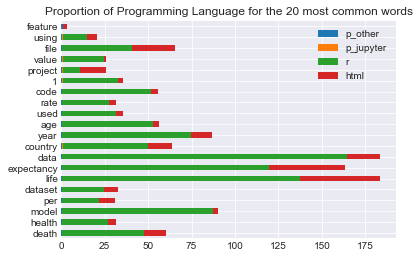

In [35]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_other=word_counts.other / word_counts['all'],
         p_jupyter=word_counts.jupyter/ word_counts['all'],
         p_r=word_counts.r / word_counts['all'],
         p_html=word_counts.html / word_counts['all'])
 .sort_values(by='all')
 [['p_other', 'p_jupyter', 'r', 'html']]
 .tail(20)
 .sort_values('p_other')
 .plot.barh(stacked=True))

plt.title('Proportion of Programming Language for the 20 most common words')